In [1]:
## California data housing prediction

In [2]:
import pandas as pd
import numpy as np

C:\Users\JOSH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\JOSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df = pd.read_csv("housing_l.csv")

In [4]:
df.head(5) # viewing top 5 rows of the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.info() #with these we noticed that the total bedroom is missing some data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.describe().T #stats of the data

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [9]:
df.shape #viewiing the number of rows to columns of our dataset

(20640, 10)

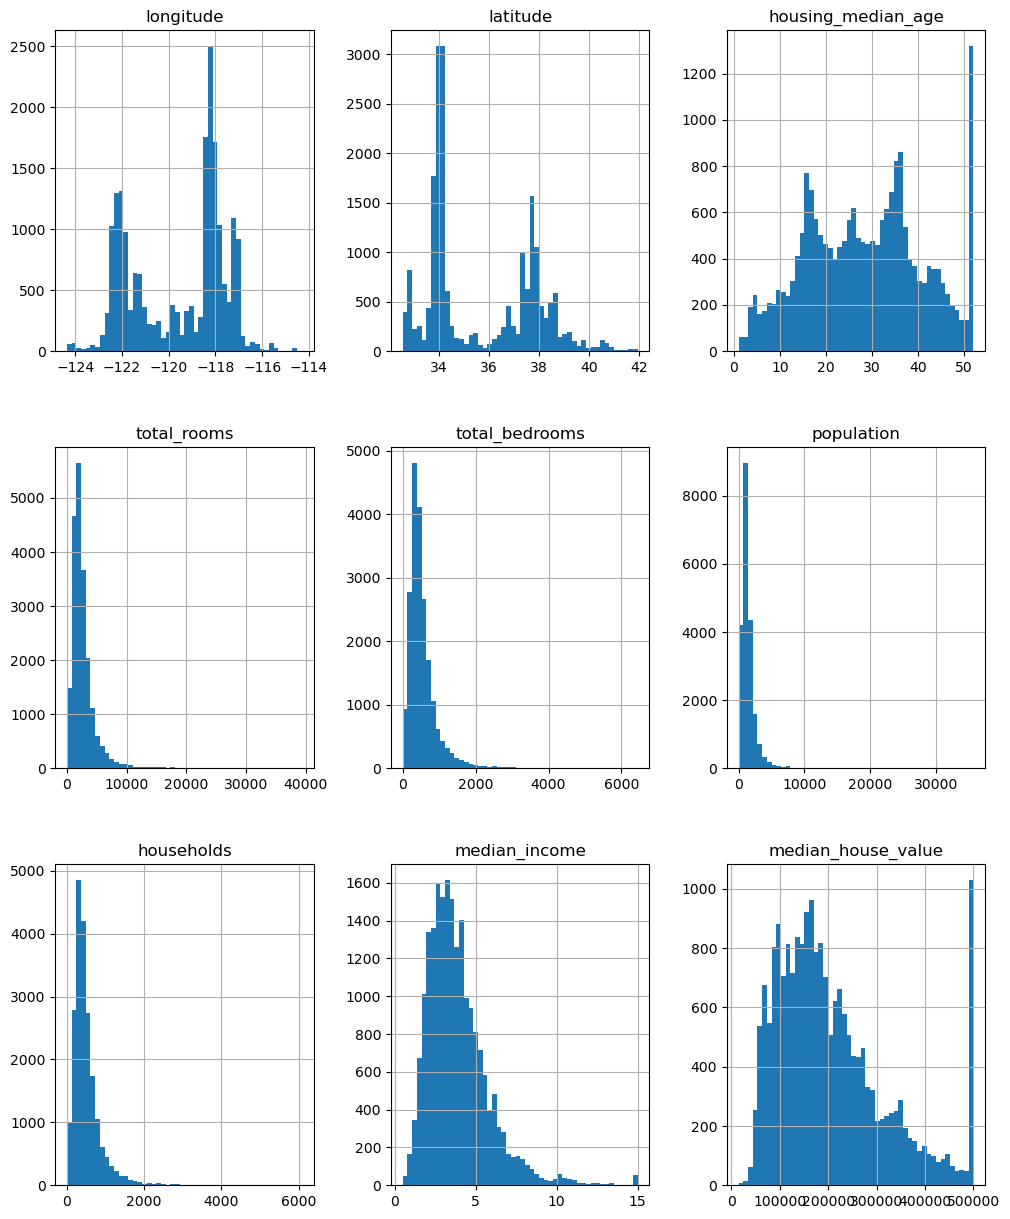

In [10]:
#using histogram to plot our numerical columns of the dataset

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12,15))
plt.show()

In [11]:
df['income_cat']=np.ceil(df['median_income']/1.5)
df['income_cat'].where(df['income_cat']< 5, 5.0, inplace=True)

In [12]:
df.income_cat.value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [14]:
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set= df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
for set in (strat_test_set, strat_train_set):
    set.drop(['income_cat'], axis=1, inplace=True)

In [16]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,500001,<1H OCEAN
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,162500,<1H OCEAN
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,204600,<1H OCEAN
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,159700,<1H OCEAN
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,184000,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19,2248,427.0,1207,368,2.8170,110000,<1H OCEAN
7275,-118.24,33.99,33,885,294.0,1270,282,2.1615,118800,<1H OCEAN
17223,-119.72,34.44,43,1781,342.0,663,358,4.7000,293800,<1H OCEAN
10786,-117.91,33.63,30,2071,412.0,1081,412,4.9125,335700,<1H OCEAN


In [17]:
housing =strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14,6665,1231.0,2026,1001,5.0900,268500,<1H OCEAN
12661,-121.42,38.51,15,7901,1422.0,4769,1418,2.8139,90400,INLAND
19263,-122.72,38.44,48,707,166.0,458,172,3.1797,140400,<1H OCEAN
19140,-122.70,38.31,14,3155,580.0,1208,501,4.1964,258100,<1H OCEAN


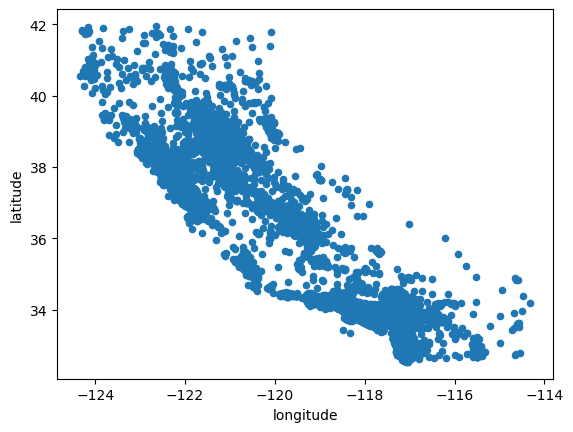

In [18]:
housing.plot(kind = 'scatter', x='longitude', y='latitude')
plt.show()

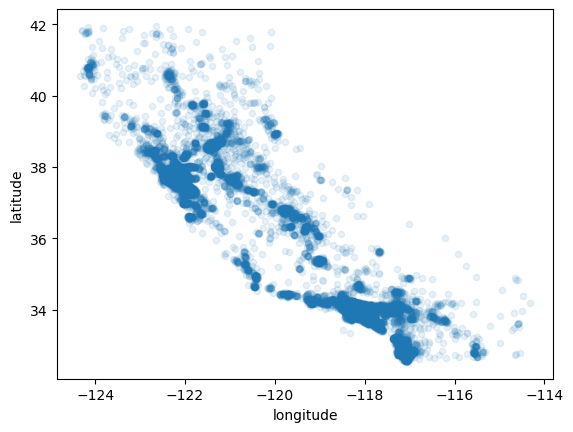

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

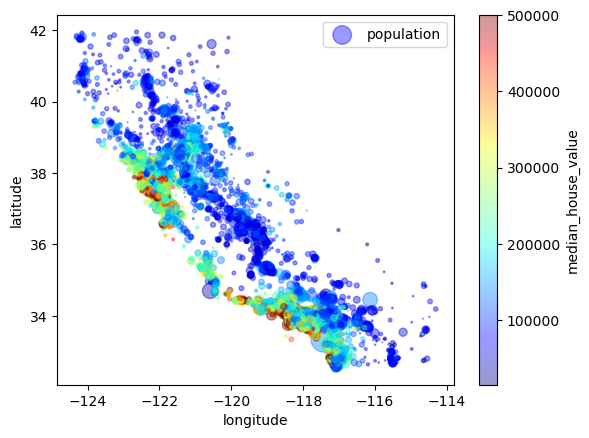

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
         s=housing['population']/100, label='population', 
         c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
         )
plt.legend()
plt.show()

In [21]:
corr = housing.corr()

In [22]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

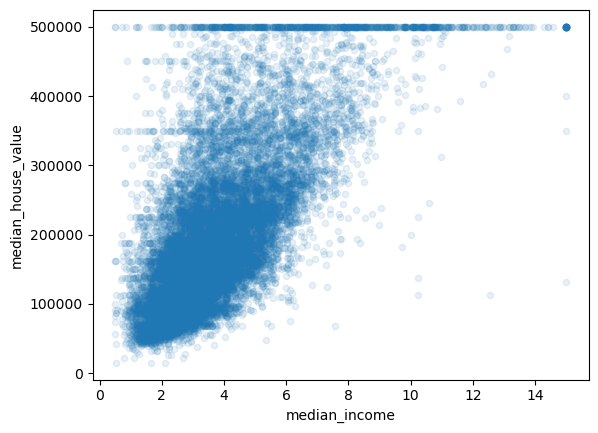

In [23]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [24]:
#s_tr.total_bedrooms
housing.households

12655     706
15502     768
2908      300
14053     483
20496     580
         ... 
15174    1001
12661    1418
19263     172
19140     501
19773     197
Name: households, Length: 16512, dtype: int64

In [25]:
#s_tr.total_rooms
housing.population

12655    2237
15502    2015
2908      667
14053     898
20496    1837
         ... 
15174    2026
12661    4769
19263     458
19140    1208
19773     625
Name: population, Length: 16512, dtype: int64

In [26]:
housing['rooms_per_households'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['pop_per_house_hold'] = housing['population']/housing['households']

In [27]:
c=housing.corr()

In [28]:
c['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687151
rooms_per_households    0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
pop_per_house_hold     -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
bedrooms_per_room      -0.259952
Name: median_house_value, dtype: float64

In [29]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [30]:
housing.shape

(16512, 9)

In [31]:
housing_num=housing.drop('ocean_proximity', axis=1)

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

In [33]:
num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [35]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [36]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

In [37]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [38]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [39]:
from sklearn.base import TransformerMixin
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder=LabelBinarizer(*args, **kwargs)
    def fit (self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [40]:
num_pipeline= Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('SimpleImputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [41]:
cat_pipeline=Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('Label_Binazer', MyLabelBinarizer())
])

In [42]:
full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])


In [43]:
housing_prepared=full_pipeline.fit_transform(housing)

In [44]:
housing_prepared.shape

(16512, 16)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr=LinearRegression()
lr.fit(housing_prepared, housing_labels)

LinearRegression()

In [47]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [48]:
data_prepared=full_pipeline.transform(some_data)

In [49]:
data_prepared.shape

(5, 16)

In [50]:
print('prediction: ', lr.predict(data_prepared))
print('Labels \t\t: ', list(some_labels))

prediction:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels 		:  [72100, 279600, 82700, 112500, 238300]


In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
housing_prediction = lr.predict(housing_prepared)
mae= np.sqrt(mean_squared_error(housing_labels,housing_prediction))

In [53]:
mae

68627.87390018745

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
tree = DecisionTreeRegressor()
tree.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [56]:
tree_prediction = tree.predict(housing_prepared)

In [57]:
tree_mae = np.sqrt(mean_squared_error(housing_labels, tree_prediction))

In [58]:
tree_mae

0.0

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
scores = cross_val_score(tree, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error',
                        cv=10)

In [61]:
rmse_scores = np.sqrt(-scores)

In [62]:
def display_score(scores):
    print('scores: ', scores)
    print('mean: ', scores.mean())
    print('standard deviation: ', scores.std())

In [63]:
display_score(rmse_scores)

scores:  [72782.43695489 70028.73654473 67815.15868766 71465.31281902
 68391.27049466 76164.80448958 70037.93760081 72982.13336725
 68472.3721782  70135.28802913]
mean:  70827.54511659322
standard deviation:  2442.4266319628564


In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [66]:
forest_predict = forest_reg.predict(housing_prepared)

In [67]:
forest_rmse = np.sqrt(mean_squared_error(housing_labels, forest_predict))

In [68]:
forest_rmse

18703.825733319627

In [69]:
scorez = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=10,
                        scoring = 'neg_mean_squared_error')

In [70]:
rmse_scorez = np.sqrt(-scorez)

In [71]:
display_score(rmse_scorez)

scores:  [51201.53768467 49125.32601027 46532.14112045 52110.63500003
 47274.19671732 52267.25428872 52516.30226212 50042.90783408
 48771.37353254 53781.68186948]
mean:  50362.335631968395
standard deviation:  2282.354180810459


In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
params_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]

In [74]:
forest_reg = RandomForestRegressor()

In [75]:
gridsearch = GridSearchCV(forest_reg, params_grid, cv=5, scoring = 'neg_mean_squared_error')

In [76]:
gridsearch.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [77]:
gridsearch.best_params_

{'max_features': 8, 'n_estimators': 30}

In [78]:
cvres = gridsearch.cv_results_

In [79]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64303.2120229573 {'max_features': 2, 'n_estimators': 3}
55799.98282198616 {'max_features': 2, 'n_estimators': 10}
52701.70144119719 {'max_features': 2, 'n_estimators': 30}
60615.90240068358 {'max_features': 4, 'n_estimators': 3}
53105.10213251969 {'max_features': 4, 'n_estimators': 10}
50511.11173263989 {'max_features': 4, 'n_estimators': 30}
58242.354879732186 {'max_features': 6, 'n_estimators': 3}
51603.560191519275 {'max_features': 6, 'n_estimators': 10}
50310.30465709121 {'max_features': 6, 'n_estimators': 30}
58224.869585083165 {'max_features': 8, 'n_estimators': 3}
52129.319837557334 {'max_features': 8, 'n_estimators': 10}
50235.76484158691 {'max_features': 8, 'n_estimators': 30}
62285.42958962894 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54360.19868925563 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60303.39907910409 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52552.97968701764 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [80]:
feature_importances = gridsearch.best_estimator_.feature_importances_

In [81]:
extra_attribs = ['rooms_per_households', 'bedrooms_per_room', 'pop_per_house_hold']           

In [82]:
cat_one_hot_attribs = list(encoder.classes_)

In [83]:
attributes = extra_attribs + cat_one_hot_attribs + num_attribs

In [84]:
sorted(zip(feature_importances, attributes), reverse =True)

[(0.3392710771841933, 'NEAR OCEAN'),
 (0.16775188536911614, 'total_bedrooms'),
 (0.11351156355968427, 'latitude'),
 (0.0748946547749016, 'housing_median_age'),
 (0.07174511871463467, 'rooms_per_households'),
 (0.06266028532466587, 'bedrooms_per_room'),
 (0.056414902324905876, 'longitude'),
 (0.0430840302036536, 'pop_per_house_hold'),
 (0.015081592390636571, 'ISLAND'),
 (0.015057773041229655, '<1H OCEAN'),
 (0.014056784397014792, 'INLAND'),
 (0.013909820314457639, 'NEAR BAY'),
 (0.005890893127220034, 'total_rooms'),
 (0.003366974312156931, 'households'),
 (0.0032404797815516256, 'median_income'),
 (6.216517997734647e-05, 'population')]

In [85]:
final_model =gridsearch.best_estimator_

In [86]:
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [87]:
x_test_prepared = full_pipeline.transform(x_test)

In [88]:
final_prediction=final_model.predict(x_test_prepared)

In [89]:
final_mse = np.sqrt(mean_squared_error(y_test, final_prediction))

In [90]:
final_mse

47794.57836600979